In [121]:
# Importing Libraries
import ast
import numpy as np
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [122]:
df_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [123]:
df_us['job_posted_months'] = df_us['job_posted_date'].dt.month

/var/folders/75/5f60nr9966vb92y7s6r54qx00000gn/T/ipykernel_26934/3112606390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['job_posted_months'] = df_us['job_posted_date'].dt.month


In [124]:
df_us_explode = df_us.explode('job_skills')

In [125]:
df_us_piviot = df_us_explode.pivot_table(index='job_posted_months', columns= 'job_skills', aggfunc='size', fill_value= 0)

In [126]:
df_us_piviot.loc['total'] = df_us_piviot.sum()

In [127]:
df_us_piviot = df_us_piviot[df_us_piviot.loc['total'].sort_values(ascending=False).index]
df_us_piviot = df_us_piviot.drop('total')

In [128]:
df_total = df_us.groupby('job_posted_months').size()


In [129]:
df_us_percent =df_us_piviot.div(df_total/100, axis=0 )

In [130]:
#Changing month number to months 

#df_us_percent=  df_us_percent.reset_index()
#df_us_percent['job_posted_months'] = df_us_percent['job_posted_months_no'].apply(lambda x : pd.to_datetime(x, format='%m').strftime('%b'))
#df_us_percent = df_us_percent.set_index('job_posted_months')
#df_us_percent =  df_us_percent.drop('job_posted_months_no')


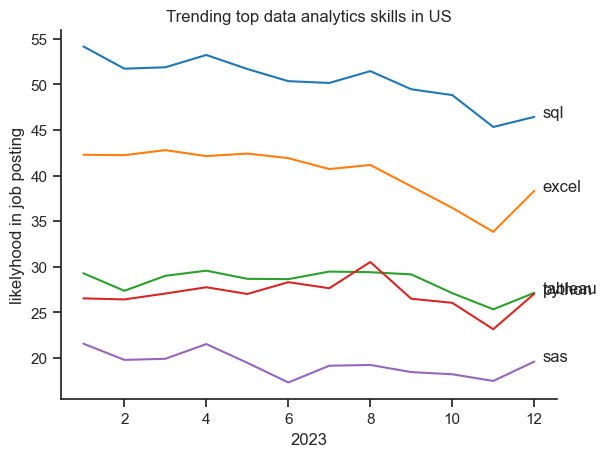

In [151]:
df_plot = df_us_percent.iloc[:,:5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()


plt.title('Trending top data analytics skills in US')
plt.ylabel('likelyhood in job posting')
plt.xlabel('2023')
plt.legend().remove()

for i in range(5):
    plt.text(12.2,df_plot.iloc[-1,i], df_plot.columns[i])


